In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

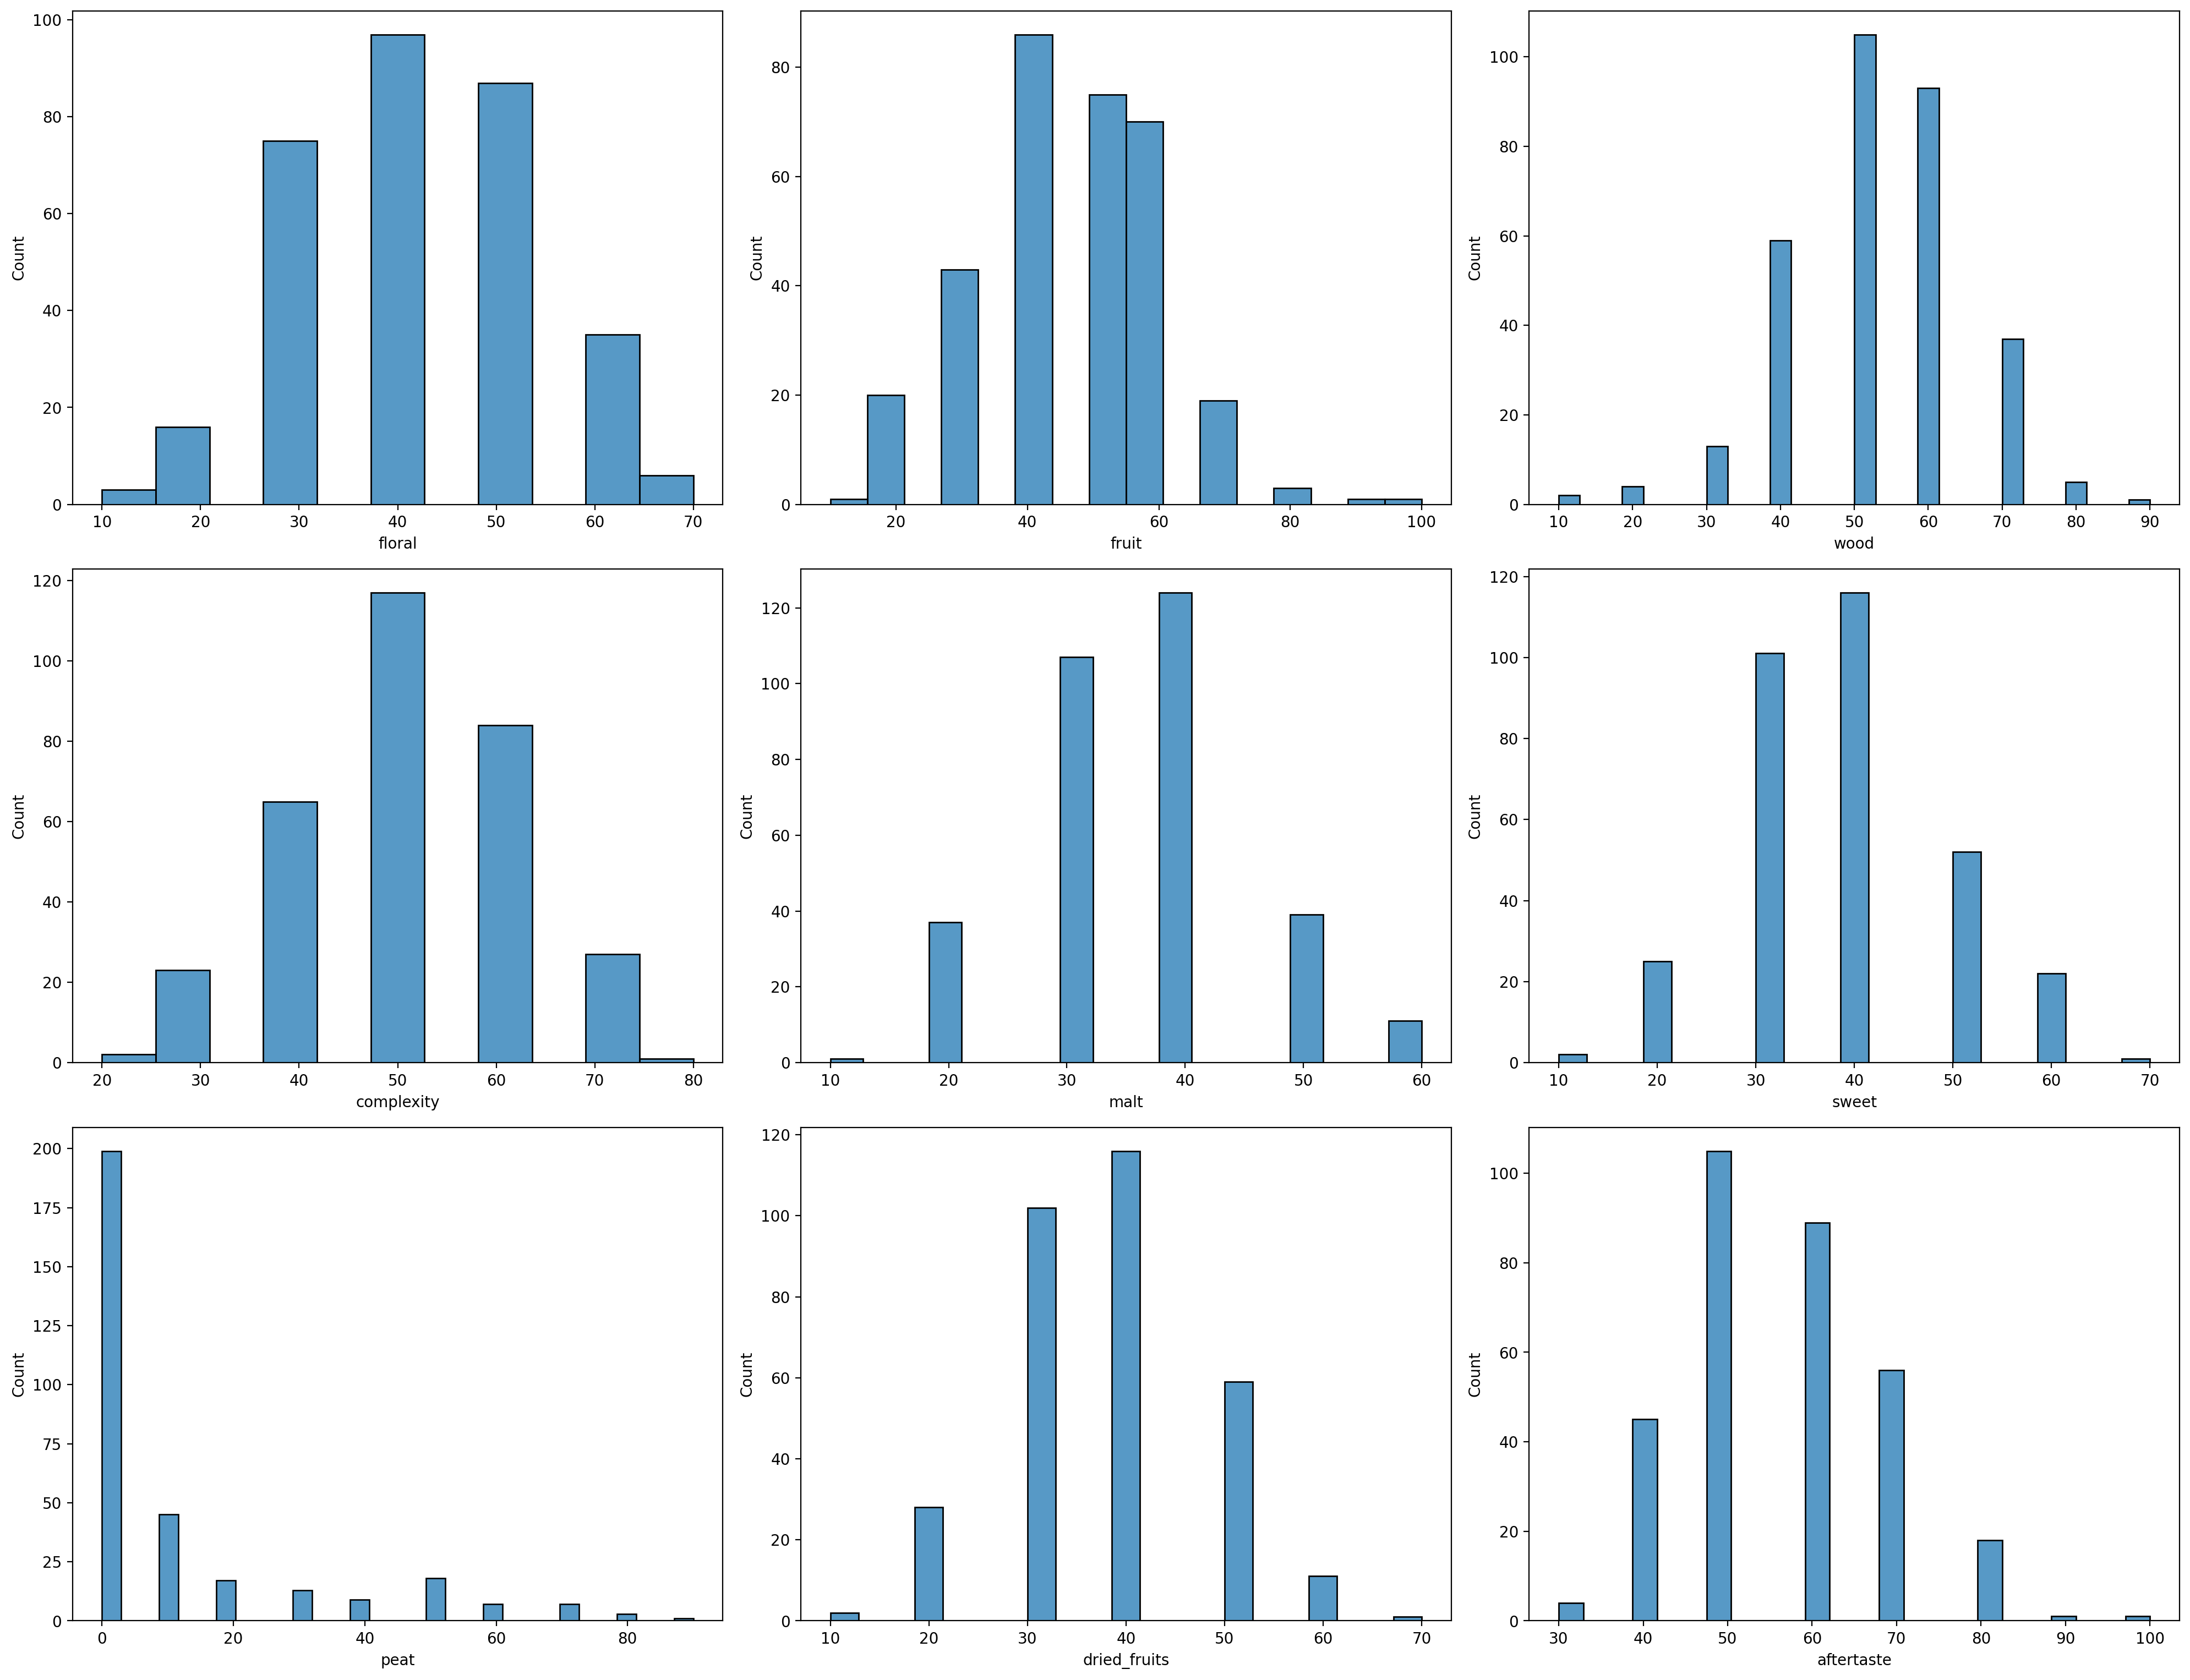

In [4]:
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.histplot(x='floral', data=panelist_data_df)

plt.subplot(4, 3, 2)
sns.histplot(x='fruit', data=panelist_data_df)

plt.subplot(4, 3, 3)
sns.histplot(x='wood', data=panelist_data_df)

plt.subplot(4, 3, 4)
sns.histplot(x='complexity', data=panelist_data_df)

plt.subplot(4, 3, 5)
sns.histplot(x='malt', data=panelist_data_df)

plt.subplot(4, 3, 6)
sns.histplot(x='sweet', data=panelist_data_df)

plt.subplot(4, 3, 7)
sns.histplot(x='peat', data=panelist_data_df)

plt.subplot(4, 3, 8)
sns.histplot(x='dried_fruits', data=panelist_data_df)

plt.subplot(4, 3, 9)
sns.histplot(x='aftertaste', data=panelist_data_df)

plt.tight_layout()
plt.show()


#### filter only sweet samples

In [200]:
# ms data
data = pd.read_csv('data/cas_intensities.csv', delimiter=',', index_col = 0)
# only use first repliat
data = data[data["replicate"]==1]
ms_data = data.drop(columns=["replicate"])

In [221]:
# get only comparable samplekeys
valid_indexes = [index for index in panelist_data_df.index if index in ms_data.index]
ms_data_comp = ms_data.loc[valid_indexes]
panelist_data_comp = panelist_data_df.loc[valid_indexes]

In [203]:
sweet_sample_ids = panelist_data_comp[panelist_data_comp["sweet"]>= 60].index
not_sweet_sample_ids = panelist_data_comp[panelist_data_comp["sweet"]<= 20].index
average_sweet_sample_ids = panelist_data_comp[(panelist_data_comp["sweet"] >= 30) & (panelist_data_comp["sweet"] <= 50)]["sweet"].index


In [204]:
CAS_to_mol = pd.read_table("data/CAS_mol_OD.csv", delimiter=',',  names= ["CAS","intensity", "odor"])
CAS_to_mol=CAS_to_mol.drop(columns=["intensity","odor"])
CAS_to_mol= CAS_to_mol.drop_duplicates()
CAS_to_mol

,CAS
(-)-carvone,6485-40-1
(-)-cis-rose oxide,3033-23-6
(-)-cubenol,21284-22-0
(-)-nootkatone,38427-78-0
(-)-β-bisabolene,495-61-4
...,...
δ-dodecalactone,713-95-1
δ-elemene,20307-84-0
δ-muurolene,120021-96-7
δ-terpinene,586-62-9


In [205]:
# all molecules that where labeled as sweet in flavornet
sweet_descriptors = ["benzyl alcohol","ethyl phenylacetate","tridecanal","nerol","methyl hexanoate","linalyl isovalerate","undecanaldehyde","caryophyllene oxide","linalyl acetate","safranal","uncineol","phenylethanal","p-anisaldehyde","eudesmol","ethylmethyl pyrazine","citronellyl butyrate","4-methyl-3-penten-2-one","nonyl acetate","10-epi-γ-eudesmol","β-bisabolol","(Z)-6-dodecene-γ-lactone","β-farnesene","2-dodecenal","γ-dodecalactone","epoxy-β-ionone","2-undecenal","styrene glycol","methyl furaneol","(-)-cis-rose oxide","(E)-β-ocimene","dimethylmethoxyfuranone","1,8-cineole","ethylbenzaldehyde","2-pentylthiophene","α-farnesene","methionol","7-methoxycoumarin","(Z)-3-hexenyl-2-methylbutanoate","o-aminoacetophenone","viridiflorol","isopiperitone","β-sinensal","ethyl vanillate","methyl butanoate","p-methoxystyrene","ethanol","6-Methoxyeugenol","4-hexanolide","δ-dodecalactone","sesquiphellandrene","diethyl malate","linalyl butyrate","guaiacol","coumarin","methyl benzoate","isopropyl benzoate","safrole","durene","γ-butyrolactone","ethyl isobutyrate","furfural"]

In [206]:
# find cas numbers for thes molecules
sweet_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"]for index in sweet_descriptors if index in CAS_to_mol.index ]
sweet_descriptors_CAS

['100-51-6',
 '101-97-3',
 '10486-19-8',
 '106-25-2',
 '106-70-7',
 '1118-27-0',
 '112-44-7',
 '1139-30-6',
 '115-95-7',
 '116-26-7',
 '1209-71-8',
 '122-78-1',
 '123-11-5',
 '123123-38-6',
 '13360-64-0',
 '141-16-2',
 '141-79-7',
 '143-13-5',
 '15051-81-7',
 '15352-77-9',
 '18679-18-0',
 '18794-84-8',
 '20407-84-5',
 '07.05.2305',
 '23267-57-4',
 '2463-77-6',
 '25779-13-9',
 '27538-09-6',
 '3033-23-6',
 '3779-61-1',
 '4077-47-8',
 '470-82-6',
 '4748-78-1',
 '4861-58-9',
 '502-61-4',
 '505-10-2',
 '531-59-9',
 '53398-85-9',
 '551-93-9',
 '552-02-3',
 '58615-39-7',
 '60066-88-8',
 '617-05-0',
 '623-42-7',
 '637-69-4',
 '64-17-5',
 '6627-88-9',
 '695-06-7',
 '713-95-1',
 '73744-93-1',
 '03.12.7554',
 '78-36-4',
 '90-05-1',
 '91-64-5',
 '93-58-3',
 '939-48-0',
 '94-59-7',
 '95-93-2',
 '96-48-0',
 '97-62-1',
 '98-01-1']

In [208]:
sweet_ms= ms_data_comp.loc[sweet_sample_ids]
not_sweet_ms = ms_data_comp.loc[not_sweet_sample_ids]
average_sweet_ms = ms_data_comp.loc[average_sweet_sample_ids]

In [209]:
not_sweet_sample_ids

Index(['000436', '000438', '000439', '000484', '000489', '000515', '000517',
       '000535', '000605', '000607', '000618', '000582', '000596'],
      dtype='object', name='samplekey')

In [222]:
violin_df = pd.DataFrame.copy(ms_data_comp)
violin_df["category"]= list((pd.Series(violin_df.index)).apply((lambda x: 'sweet' if x in sweet_sample_ids else ('not sweet' if x in not_sweet_sample_ids else 'average'))))

In [211]:
violin_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3,category
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,2.825842e+08,2.133618e+09,1.376122e+08,1.129117e+08,1.241942e+08,1.241942e+08,7.594208e+08,2.825842e+08,2.825842e+08,2.133618e+09,...,1.241942e+08,1.376122e+08,5.743096e+08,5.743096e+08,1.934397e+08,1.241942e+08,1.241942e+08,3.090106e+08,3.111124e+08,average
000657,2.490753e+08,2.387300e+09,1.174299e+08,1.045745e+08,1.101815e+08,1.101815e+08,7.396865e+08,2.490753e+08,2.490753e+08,2.387300e+09,...,1.101815e+08,1.174299e+08,5.553109e+08,5.553109e+08,1.719868e+08,1.101815e+08,1.101815e+08,2.527582e+08,2.963368e+08,average
000658,3.063394e+08,2.208002e+09,2.074207e+08,2.021848e+08,2.078365e+08,2.078365e+08,1.000881e+09,3.063394e+08,3.063394e+08,2.208002e+09,...,2.078365e+08,2.074207e+08,6.027752e+08,6.027752e+08,2.912135e+08,2.078365e+08,2.078365e+08,3.783629e+08,3.502243e+08,average
000838,3.004512e+08,1.648801e+09,3.530315e+08,2.960716e+08,3.052143e+08,3.052143e+08,5.457252e+08,3.004512e+08,3.004512e+08,1.648801e+09,...,3.052143e+08,3.530315e+08,2.109654e+08,2.109654e+08,2.575301e+08,3.052143e+08,3.052143e+08,4.299386e+08,3.679643e+08,average
000839,2.712269e+08,1.642697e+09,2.395558e+08,1.728214e+08,1.322088e+08,1.322088e+08,3.473576e+08,2.712269e+08,2.712269e+08,1.642697e+09,...,1.322088e+08,2.395558e+08,1.579338e+08,1.579338e+08,1.556085e+08,1.322088e+08,1.322088e+08,1.548222e+08,2.289899e+08,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,1.855528e+08,1.090820e+08,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08,average
000926,2.098708e+08,1.160679e+09,1.302705e+08,1.397330e+08,1.562665e+08,1.562665e+08,6.194031e+08,2.098708e+08,2.098708e+08,1.160679e+09,...,1.562665e+08,1.302705e+08,4.688051e+08,4.688051e+08,2.029630e+08,1.562665e+08,1.562665e+08,2.697350e+08,2.569535e+08,average
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,1.932470e+08,1.523761e+08,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08,average


In [212]:
sweet_cas_violin_df = violin_df[sweet_descriptors_CAS]

over all samples

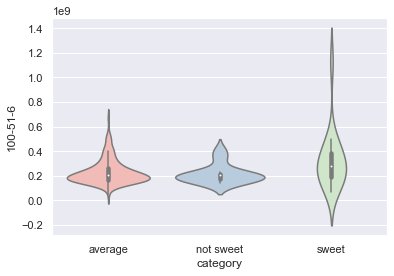

In [213]:
# looking at one specific cas number which was categories as sweet
sns.violinplot(x='category',y= '100-51-6', data=violin_df, palette="Pastel1")
plt.show()

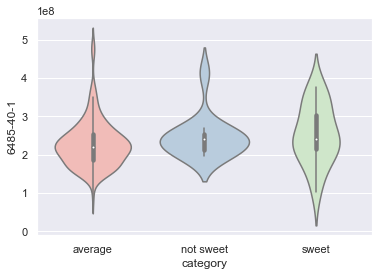

In [214]:
# looking at one specific cas number which was not categories as sweet
sns.violinplot(x='category',y= '6485-40-1' , data=violin_df, palette="Pastel1")
plt.show()

In [167]:
violin_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3,category
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,2.825842e+08,2.133618e+09,1.376122e+08,1.129117e+08,1.241942e+08,1.241942e+08,7.594208e+08,2.825842e+08,2.825842e+08,2.133618e+09,...,1.241942e+08,1.376122e+08,5.743096e+08,5.743096e+08,1.934397e+08,1.241942e+08,1.241942e+08,3.090106e+08,3.111124e+08,average
000657,2.490753e+08,2.387300e+09,1.174299e+08,1.045745e+08,1.101815e+08,1.101815e+08,7.396865e+08,2.490753e+08,2.490753e+08,2.387300e+09,...,1.101815e+08,1.174299e+08,5.553109e+08,5.553109e+08,1.719868e+08,1.101815e+08,1.101815e+08,2.527582e+08,2.963368e+08,average
000658,3.063394e+08,2.208002e+09,2.074207e+08,2.021848e+08,2.078365e+08,2.078365e+08,1.000881e+09,3.063394e+08,3.063394e+08,2.208002e+09,...,2.078365e+08,2.074207e+08,6.027752e+08,6.027752e+08,2.912135e+08,2.078365e+08,2.078365e+08,3.783629e+08,3.502243e+08,average
000838,3.004512e+08,1.648801e+09,3.530315e+08,2.960716e+08,3.052143e+08,3.052143e+08,5.457252e+08,3.004512e+08,3.004512e+08,1.648801e+09,...,3.052143e+08,3.530315e+08,2.109654e+08,2.109654e+08,2.575301e+08,3.052143e+08,3.052143e+08,4.299386e+08,3.679643e+08,average
000839,2.712269e+08,1.642697e+09,2.395558e+08,1.728214e+08,1.322088e+08,1.322088e+08,3.473576e+08,2.712269e+08,2.712269e+08,1.642697e+09,...,1.322088e+08,2.395558e+08,1.579338e+08,1.579338e+08,1.556085e+08,1.322088e+08,1.322088e+08,1.548222e+08,2.289899e+08,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,1.855528e+08,1.090820e+08,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08,average
000926,2.098708e+08,1.160679e+09,1.302705e+08,1.397330e+08,1.562665e+08,1.562665e+08,6.194031e+08,2.098708e+08,2.098708e+08,1.160679e+09,...,1.562665e+08,1.302705e+08,4.688051e+08,4.688051e+08,2.029630e+08,1.562665e+08,1.562665e+08,2.697350e+08,2.569535e+08,average
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,1.932470e+08,1.523761e+08,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08,average


one sample which is sweet

In [126]:
sweet_cas_violin_df.loc['000656']

100-51-6      3.158965e+08
101-97-3      1.422236e+08
10486-19-8    1.934397e+08
106-25-2      2.133618e+09
106-70-7      1.251766e+08
                  ...     
94-59-7       2.116599e+08
95-93-2       2.050785e+08
96-48-0       0.000000e+00
97-62-1       5.292697e+07
98-01-1       0.000000e+00
Name: 000656, Length: 61, dtype: float64

In [133]:
violin_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3,category
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,2.825842e+08,2.133618e+09,1.376122e+08,1.129117e+08,1.241942e+08,1.241942e+08,7.594208e+08,2.825842e+08,2.825842e+08,2.133618e+09,...,1.241942e+08,1.376122e+08,5.743096e+08,5.743096e+08,1.934397e+08,1.241942e+08,1.241942e+08,3.090106e+08,3.111124e+08,average
000657,2.490753e+08,2.387300e+09,1.174299e+08,1.045745e+08,1.101815e+08,1.101815e+08,7.396865e+08,2.490753e+08,2.490753e+08,2.387300e+09,...,1.101815e+08,1.174299e+08,5.553109e+08,5.553109e+08,1.719868e+08,1.101815e+08,1.101815e+08,2.527582e+08,2.963368e+08,average
000658,3.063394e+08,2.208002e+09,2.074207e+08,2.021848e+08,2.078365e+08,2.078365e+08,1.000881e+09,3.063394e+08,3.063394e+08,2.208002e+09,...,2.078365e+08,2.074207e+08,6.027752e+08,6.027752e+08,2.912135e+08,2.078365e+08,2.078365e+08,3.783629e+08,3.502243e+08,average
000838,3.004512e+08,1.648801e+09,3.530315e+08,2.960716e+08,3.052143e+08,3.052143e+08,5.457252e+08,3.004512e+08,3.004512e+08,1.648801e+09,...,3.052143e+08,3.530315e+08,2.109654e+08,2.109654e+08,2.575301e+08,3.052143e+08,3.052143e+08,4.299386e+08,3.679643e+08,average
000839,2.712269e+08,1.642697e+09,2.395558e+08,1.728214e+08,1.322088e+08,1.322088e+08,3.473576e+08,2.712269e+08,2.712269e+08,1.642697e+09,...,1.322088e+08,2.395558e+08,1.579338e+08,1.579338e+08,1.556085e+08,1.322088e+08,1.322088e+08,1.548222e+08,2.289899e+08,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,1.855528e+08,1.090820e+08,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08,average
000926,2.098708e+08,1.160679e+09,1.302705e+08,1.397330e+08,1.562665e+08,1.562665e+08,6.194031e+08,2.098708e+08,2.098708e+08,1.160679e+09,...,1.562665e+08,1.302705e+08,4.688051e+08,4.688051e+08,2.029630e+08,1.562665e+08,1.562665e+08,2.697350e+08,2.569535e+08,average
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,1.932470e+08,1.523761e+08,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08,average


In [224]:
CAS_labeled = pd.DataFrame({"intensity": ms_data_comp.loc["000656"]})
CAS_labeled["category"] = list((pd.Series(CAS_labeled.index)).apply((lambda x: 'sweet' if x in sweet_descriptors_CAS else 'not sweet')))

<AxesSubplot:xlabel='category', ylabel='intensity'>

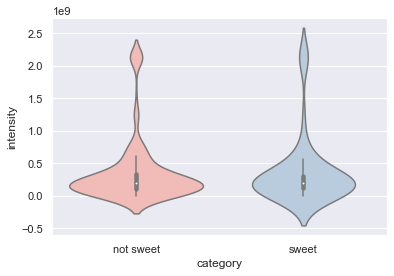

In [225]:
# looking at one sample
sns.violinplot(x='category',y="intensity" , data=CAS_labeled, palette="Pastel1")


expectation: finding new CAS numbers which are corresponding to sweet and repeat the plot

In [227]:
CAS_labeled[CAS_labeled["category"]=="sweet"]

,intensity,category
3033-23-6,2.133618e+09,sweet
3779-61-1,3.090106e+08,sweet
53398-85-9,3.111124e+08,sweet
18679-18-0,1.470269e+08,sweet
470-82-6,2.133618e+09,sweet
...,...,...
18794-84-8,1.241942e+08,sweet
60066-88-8,1.129117e+08,sweet
96-48-0,0.000000e+00,sweet
07.05.2305,1.934397e+08,sweet


In [230]:
only_sweet_CAS_one_sample = CAS_labeled[CAS_labeled["category"]=="sweet"]

<AxesSubplot:ylabel='intensity'>

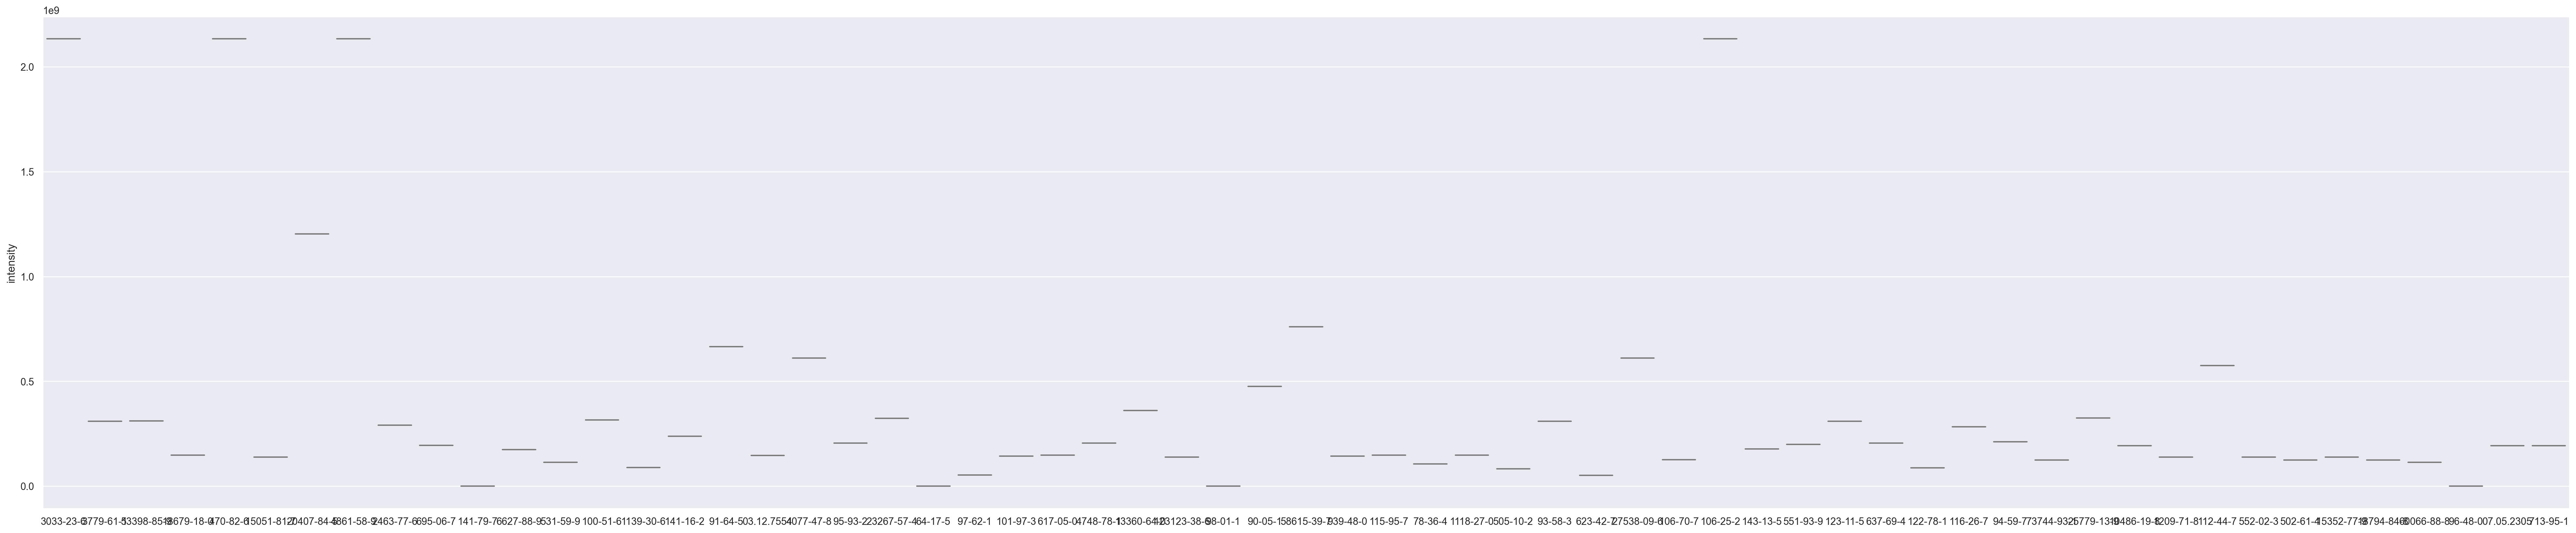

In [233]:
plt.figure(figsize=(50, 10), dpi=200)

sns.violinplot(x=only_sweet_CAS_one_sample.index,y="intensity" , data=only_sweet_CAS_one_sample, palette="Pastel1")
